# Importing files

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from copy import deepcopy

In [2]:
df = pd.read_csv("data/Iris.csv")
df.drop('Id',axis=1,inplace=True)

# Data Visualisation

In [3]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
len(df) 

150

In [5]:
# Change categorical data to number 0-2
df["Species"] = pd.Categorical(df["Species"])
df["Species"] = df["Species"].cat.codes
# Change dataframe to numpy matrix
data = df.values[0:120, 0:4]
category = df.values[0:120, 4]


[]

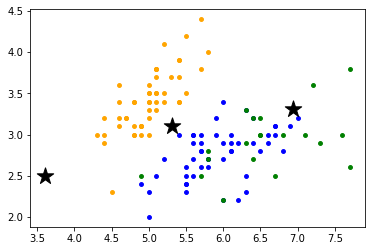

In [6]:
# Number of clusters
k = 3
# Number of training data
n = data.shape[0]
# Number of features in the data
c = data.shape[1]

# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)
centers = np.random.randn(k,c)*std + mean

# Plot the data and the centers generated as random
colors=['orange', 'blue', 'green']
for i in range(n):
    plt.scatter(data[i, 0], data[i,1], s=15, color = colors[int(category[i])])
plt.scatter(centers[:,0], centers[:,1], marker='*', c='k', s=300)
plt.plot()

# Training

In [7]:
centers_old = np.zeros(centers.shape) 
centers_new = deepcopy(centers) 

clusters = np.zeros(n)
distances = np.zeros((n,k))

error = np.linalg.norm(centers_new - centers_old)

# while loop to iterate the cycle
while error != 0:
    # Measure the distance to every center
    for i in range(k):
        distances[:,i] = np.linalg.norm(data - centers[i], axis=1)
    # Assign all training data to closest center
    clusters = np.argmin(distances, axis = 1)
    
    centers_old = deepcopy(centers_new)
    # Calculate mean for every cluster and update the center
    for i in range(k):
        centers_new[i] = np.mean(data[clusters == i], axis=0)
    error = np.linalg.norm(centers_new - centers_old)
centers_new    

array([[5.37021277, 3.09042553, 2.7606383 , 0.75638298],
       [5.46666667, 2.6       , 4.86666667, 2.03333333],
       [6.83043478, 3.02173913, 5.44347826, 1.83478261]])

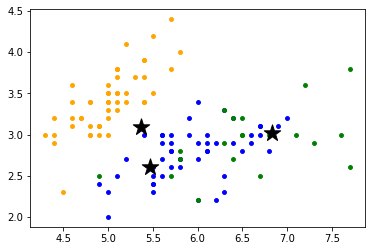

In [8]:
# Plot the data and the centers generated as random
colors=['orange', 'blue', 'green']
for i in range(n):
    plt.scatter(data[i, 0], data[i,1], s=15, color = colors[int(category[i])])
plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='k', s=300)

# Testing/evaluation

In [9]:
test_data = df.values[n:len(df), 0:4]
test_category = df.values[n:len(df), 4]

In [10]:
test_distances = np.zeros((len(df)-n,k))

# Measure the distance to every center
for i in range(k):
    test_distances[:,i] = np.linalg.norm(test_data - centers_new[i], axis=1)
# Assign all training data to closest center
predicted_category = np.argmin(test_distances, axis = 1)

In [11]:
min_distances = np.min(test_distances, axis = 1)
test_error = np.mean(min_distances)
print(test_error)

0.7313004938337286


# Data Visualisation

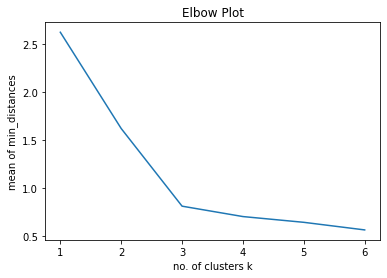

In [12]:

x=[1,2,3,4,5,6]
y=[2.6264508722864854,1.6229417575575635,0.813635597922854,0.7052355085039584,0.6452355085039584,0.5660773162377959]
# plotting the points
plt.plot(x, y)
plt.xlabel('no. of clusters k')
plt.ylabel('mean of min_distances')
plt.title('Elbow Plot')
plt.show()
